# User defined colour list

This is a single cell notebook to demonstrate temperature plotting given user defined colour list.

Providing full list of colours to Magics gives the user most control of which colours will be used, leaving Magics no space for calculating colours.  
If the number of colours given is smaller than number of levels, the last colour will be repeated for all the missing levels.

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

### Important parameters

For setting the colour list, two parameters are important:  
**contour_shade_colour_method** - to be set to **'list'** and   
**contour_shade_colour_list** - provided list of colours.   

Colours can be given as [named colours](https://confluence.ecmwf.int/display/MAGP/Setting+colours), RGB, HSL or HEX values.  

To get the shading without isolines, don't forget to set:   
**contour** to **'off'**

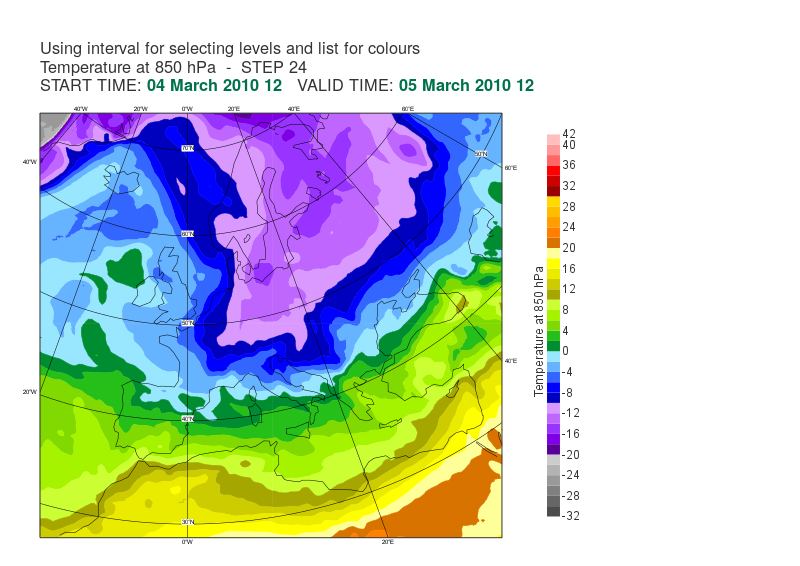

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "europe",
    page_id_line             = "off"
)

#Setting the coastline
coast = magics.mcoast()

#Loading GRIB file
temperature = magics.mgrib(grib_input_file_name = "../../data/t850.grib")

#Defining the contour
contour = magics.mcont(
    contour_level_selection_type = "interval",
    contour_interval             = 2.00,
    contour_shade_method         = "area_fill",
    contour_shade                = "on",
    contour_shade_max_level      = 42.00,
    contour_shade_min_level      = -32.00,
    contour_label                = "off",
    legend                       = "on",
    contour                      = "off",
    contour_shade_colour_method  = "list",
    contour_shade_colour_list    = ["rgb(0.3,0.3,0.3)", "rgb(0.4,0.4,0.4)", "rgb(0.5,0.5,0.5)", 
                                    "rgb(0.6,0.6,0.6)", "rgb(0.7,0.7,0.7)","rgb(0.8,0.8,0.8)", 
                                    "rgb(0.35,0,0.6)", "rgb(0.5,0,0.9)", "rgb(0.6,0.2,1)", 
                                    "rgb(0.75,0.4,1)", "rgb(0.85,0.6,1)", "rgb(0,0,0.75)", 
                                    "rgb(0,0,1)", "rgb(0.2,0.4,1)", "rgb(0.4,0.7,1)", 
                                    "rgb(0.6,0.9,1)", "rgb(0,0.55,0.19)", "rgb(0.15,0.75,0.1)", 
                                    "rgb(0.5,0.85,0)", "rgb(0.65,0.95,0)", "rgb(0.8,1,0.2)", 
                                    "rgb(0.65,0.65,0)", "rgb(0.8,0.8,0)", "rgb(0.92,0.92,0)", 
                                    "rgb(1,1,0)", "rgb(1,1,0.6)", "rgb(0.85,0.45,0)", 
                                    "rgb(1,0.5,0)", "rgb(1,0.62,0)", "rgb(1,0.74,0)", 
                                    "rgb(1,0.85,0)", "rgb(0.6,0,0)", "rgb(0.8,0,0)", "rgb(1,0,0)", 
                                    "rgb(1,0.4,0.4)", "rgb(1,0.6,0.6)", "rgb(1,0.75,0.75)"])

#Defining the legend
legend = magics.mlegend(
    legend_display_type        = "continuous",
    legend_box_mode            = "automatic",
    legend_title               = "on",
    legend_title_text          = "Temperature at 850 hPa",
    legend_automatic_position  = "right",
    legend_label_frequency     = 2,
    legend_text_font_size      = 0.5,
    legend_text_colour         = "charcoal",    
    legend_entry_border        = "on",
    legend_entry_border_colour = "none") 

#Setting the title
title = magics.mtext( 
    text_lines          = ["Using interval for selecting levels and list for colours",
                           "<grib_info key='name'/> at <grib_info key='level'/> hPa  -  STEP <grib_info key='step'/>",
                           "START TIME: <font colour='evergreen' style='bold'><grib_info key='base-date' format='%d %B %Y %H'/></font>   VALID TIME: <font colour='evergreen' style='bold'><grib_info key='valid-date' format='%d %B %Y %H'/></font>"],
    text_justification  = 'left',
    text_font_size      = 0.7,
    text_mode           = "automatic",
    text_colour         = "charcoal") 

#Plotting
magics.plot(projection, temperature, contour, coast, legend, title)